In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


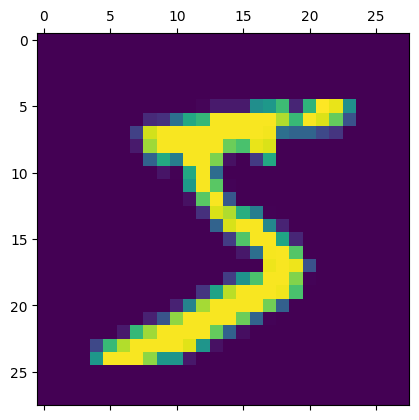

In [ ]:
plt.matshow(x_train[0])

In [3]:
# normalize the data(0-1) # [0-255]------> [0 - 1]

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# reshape, include the channels  RGB--->Grey Scales
x_train = x_train.reshape(-1,28,28,1)  # -1---len(x_train)
x_test = x_test.reshape(-1,28,28,1)

#Building the model

**Create a Sequential model**

models.Sequential([...])
A simple stack of layers, where the output of one is the input to the next.

**Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))**

Learns 32 filters (feature detectors), each 3×3, scanning the image.

**input_shape=(28,28,1) says “28×28 pixels, 1 channel (grayscale)”.**

relu turns negative values to 0, helping the network learn non-linear patterns.

Output shape: 26×26×32 (because 28−3+1 = 26 with valid padding).

**MaxPooling2D((2,2))**

Takes the max in each 2×2 window, downsampling to reduce size and overfitting; adds a bit of translation invariance.

Output shape: 13×13×32.

**Conv2D(64, (3,3), activation='relu')**

Another conv layer with 64 filters to learn more complex patterns from the previous feature maps.

Output shape: 11×11×64 (13−3+1 = 11).

**MaxPooling2D((2,2))**

Downsamples again.

Output shape: 5×5×64 (floor of 11/2).

**Flatten()**

Converts the 3D tensor to a 1D vector so it can go into fully connected layers.

Output shape: 5×5×64 = 1600 units.

**Dense(64, activation='relu')**

A fully connected layer that mixes all features and learns non-linear combinations.

Output shape: 64.

**Dense(10, activation='softmax')**

Final classification layer for 10 classes.

softmax outputs a probability distribution that sums to 1.

Output shape: 10 (one probability per class).

In [5]:
# Build the CNN model
model = models.Sequential([ layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(64,activation='relu'),
                           layers.Dense(10,activation='softmax')])

# compile the model
model.compile(optimizer ='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'] )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Training
model.fit(x_train, y_train,epochs = 5, validation_data=(x_test,y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc: .4f}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8953 - loss: 0.3421 - val_accuracy: 0.9819 - val_loss: 0.0559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0501 - val_accuracy: 0.9844 - val_loss: 0.0453
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9895 - val_loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9899 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9901 - val_loss: 0.0306
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0394
Test accuracy:  0.9901


In [7]:
x_test[5]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [8]:
# loading an image
from PIL import Image

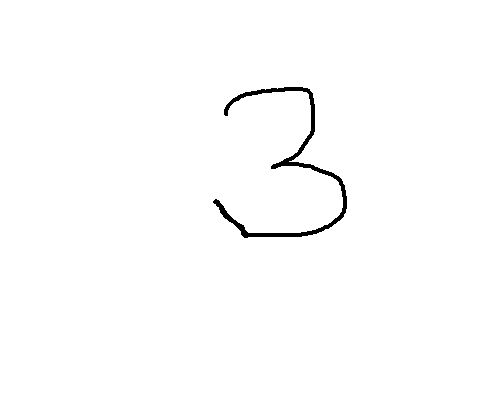

In [9]:
Image.open('/content/imgof3.png')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
img = Image.open('/content/imgof3.png').convert('L') # convert to gray scale

In [12]:
img = img.resize((28,28))

In [13]:
import numpy as np
img_array = np.array(img)

In [14]:
img_array

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 248, 244, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251,
        198, 180, 185, 186, 202, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 207,
        214, 252, 255, 255, 196, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242,
        255, 255, 255, 255, 199, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 250, 194, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 205, 229, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 253, 185, 141, 201, 243, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 243, 249, 220, 179, 233, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255,
        255, 255, 255, 255, 255, 240, 203, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 241, 188,
        255, 255, 255, 255, 255, 247, 199, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 186,
        206, 255, 255, 255, 249, 195, 219, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        170, 184, 188, 186, 179, 216, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 245, 246, 246, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [15]:
img_array = img_array - 255

In [16]:
img_array = img_array/255

In [17]:
input_data = img_array.reshape(1,28,28,1)  #--grey scale

In [18]:
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


array([[2.8297922e-05, 1.6492947e-06, 1.3308106e-04, 9.9876463e-01,
        2.3121058e-05, 5.1002019e-07, 4.6277275e-08, 1.6679478e-05,
        5.6761026e-04, 4.6462016e-04]], dtype=float32)

In [27]:
pred = model.predict(input_data)
np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


np.int64(5)

In [28]:
img = Image.open('/content/imgof6.png').convert('L') # convert to gray scale img = img.resize((28,28)) #Resizes to 28×28, the input size expected by your CNN. import numpy as np '''Converts the PIL image into a NumPy array of pixel values. Now shape is (28, 28). Values range from 0 (black) to 255 (white).''' img_array = np.array(img) #img_array = img_array / 255.0 # correct normalization # scale pixels to [0,1] by dividing by 255. img_array = 255 - img_array # invert colors img_array = img_array / 255.0 ''' Reshapes from (28,28) → (1,28,28,1). 1 = batch size (predicting one image). 28,28 = image dimensions. 1 = grayscale channel. This matches the model’s input shape.''' input_data = img_array.reshape(1,28,28,1) #--grey scale pred = model.predict(input_data) '''Model outputs probabilities for each of the 10 classes (digits 0–9). pred.shape = (1,10) → 1 row (one image), 10 columns (one probability per class).''' np.argmax(pred) #'''argmax returns the index of the largest probability.If the 3rd element is highest, it returns 2.That’s the predicted digit''' #Image → resize → grayscale → normalize → reshape → CNN → probability distribution → pick max → predicted digit.

In [32]:
from PIL import Image
import numpy as np

# Load & preprocess
img = Image.open('/content/imgof6.png').convert('L')
img = img.resize((28, 28))#Lanczos is a high-quality image resizing algorithm used when you scale images up or down.

img_array = np.array(img)

# Invert if needed (black digit on white background)
img_array = img_array - 255

# Normalize
img_array = img_array / 255.0

# Reshape
input_data = img_array.reshape(1, 28, 28, 1)

# Predict
pred = model.predict(input_data)
print("Predicted probabilities:", pred)
print("Predicted digit:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted probabilities: [[1.8895844e-03 1.4526021e-03 9.7147282e-03 2.1014221e-03 7.3758839e-03
  3.3815303e-01 1.2116841e-01 1.3047067e-05 1.3184349e-01 3.8628778e-01]]
Predicted digit: 9
